First 5 rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905  

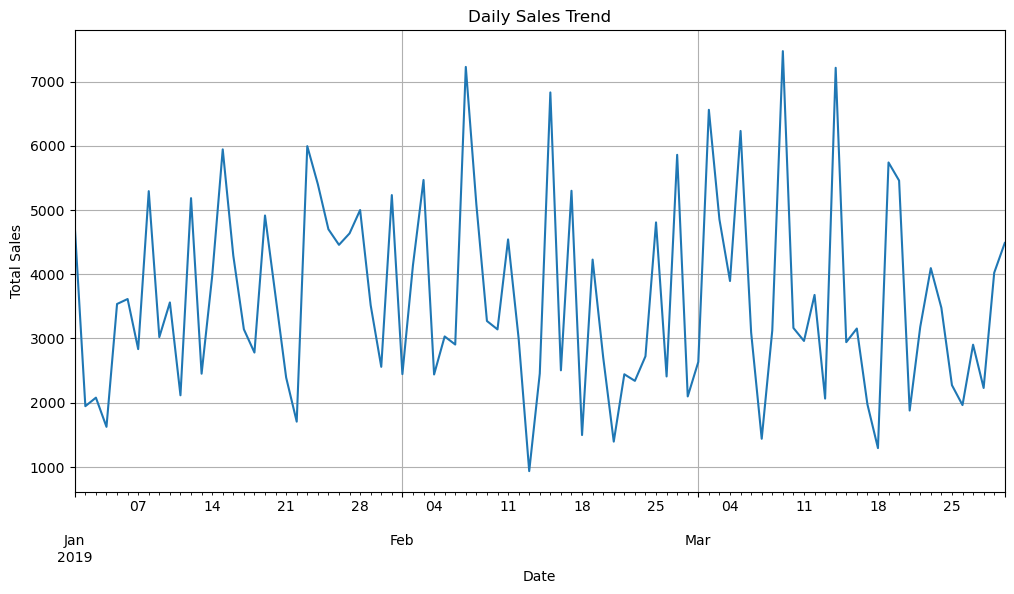


Month with the highest total sales: January

Average rating given by customers: 6.9727

Branch with the highest customer rating: C


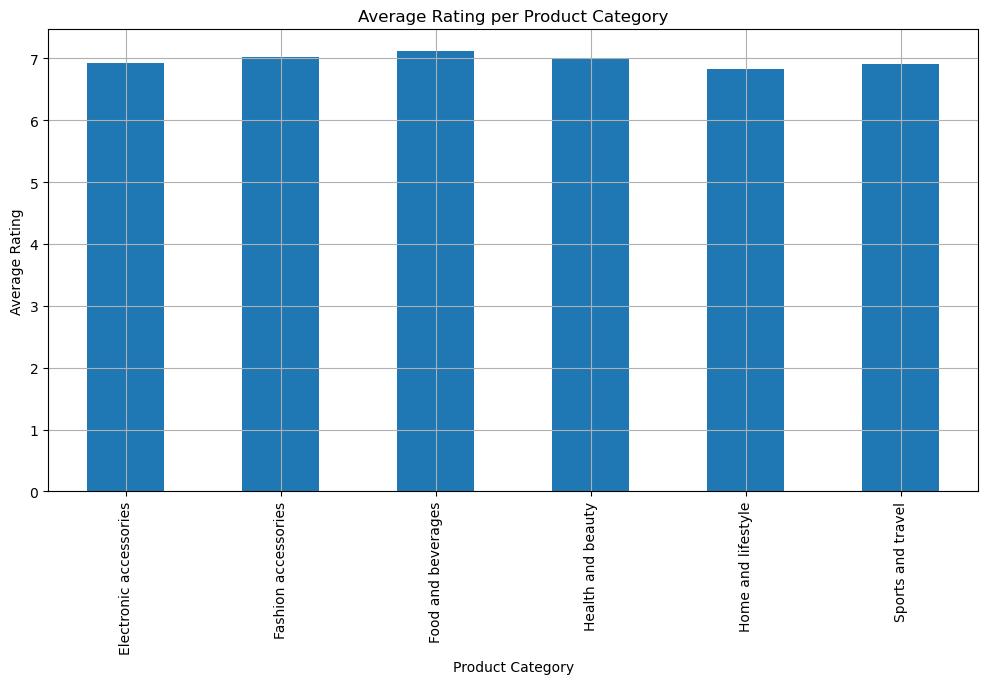

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
 

df = pd.read_csv('supermarket_sales.csv')
 

print("First 5 rows of the dataset:")
print(df.head())
 

print("\nNumber of rows and columns in the dataset:")
print(df.shape)
 

print("\nMissing values in the dataset:")
print(df.isnull().sum())
 

total_revenue = df['Total'].sum()
print(f"\nTotal revenue generated by the supermarket: {total_revenue}")
 

highest_sales_branch = df.groupby('Branch')['Total'].sum().idxmax()
print(f"\nBranch with the highest sales: {highest_sales_branch}")
 

most_sold_product_category = df.groupby('Product line')['Quantity'].sum().idxmax()
print(f"\nMost sold product category: {most_sold_product_category}")
 

average_transaction_amount = df['Total'].mean()
print(f"\nAverage transaction amount: {average_transaction_amount}")
 

unique_customers = df['Invoice ID'].nunique()
print(f"\nNumber of unique customers: {unique_customers}")
 

sales_by_customer_type = df.groupby('Customer type')['Total'].sum()
print(f"\nTotal sales made by Members vs. Non-Members:\n{sales_by_customer_type}")
 

most_preferred_payment_method = df['Payment'].value_counts().idxmax()
print(f"\nMost preferred payment method: {most_preferred_payment_method}")
 

df['Date'] = pd.to_datetime(df['Date'])
df['Day of Week'] = df['Date'].dt.day_name()
highest_sales_day = df.groupby('Day of Week')['Total'].sum().idxmax()
print(f"\nDay of the week with the highest sales: {highest_sales_day}")
 

daily_sales_trend = df.groupby('Date')['Total'].sum()
plt.figure(figsize=(12, 6))
daily_sales_trend.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
 

df['Month'] = df['Date'].dt.month_name()
highest_sales_month = df.groupby('Month')['Total'].sum().idxmax()
print(f"\nMonth with the highest total sales: {highest_sales_month}")
 

average_rating = df['Rating'].mean()
print(f"\nAverage rating given by customers: {average_rating}")
 

highest_rating_branch = df.groupby('Branch')['Rating'].mean().idxmax()
print(f"\nBranch with the highest customer rating: {highest_rating_branch}")
 

average_rating_per_category = df.groupby('Product line')['Rating'].mean()
plt.figure(figsize=(12, 6))
average_rating_per_category.plot(kind='bar')
plt.title('Average Rating per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()